<a href="https://colab.research.google.com/github/rostro36/Partisan-Responses/blob/master/network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx
#https://networkx.github.io/documentation/stable/reference/classes/multigraph.html#methods
import matplotlib.pyplot as plt

In [0]:
sample=[[[],[('I','like','ice cream')],[('I', 'introducing','the College Opportunity Tax Credit Act of 2009')],[('This legislation','creates','a new tax credit that will put the cost of higher education in reach for American families'),('a new tax credit','put','the cost of higher education')]],'dem']

def other(partisanship):
  if partisanship =='rep':
    return 'dem'
  if partisanship =='dem':
    return 'rep'


MG=nx.MultiGraph()
partisanship=sample[1]
for sentence in sample[0]:
  for phrase in sentence:
    subject=phrase[0]
    objekt=phrase[2]
    predicate=phrase[1]
    attributes=MG.get_edge_data(subject,objekt,predicate)
    if attributes:
      MG.remove_edge(subject,objekt,predicate)
      weight=attributes['weight']+1
      if partisanship in ('dem','rep'):
        attributes[partisanship]=attributes[partisanship]+1
      dem=attributes['dem']
      rep=attributes['rep']
    else:
      weight=1
      dem=0
      rep=0
      if partisanship=='dem':
        dem=1
      elif partisanship=='rep':
        rep=1
    MG.add_edge(subject,objekt, key=predicate, weight=weight,dem=dem,rep=rep)

{'weight': 1, 'dem': 1, 'rep': 0}
None
[('I', 'ice cream', 'like'), ('I', 'the College Opportunity Tax Credit Act of 2009', 'introducing'), ('This legislation', 'a new tax credit that will put the cost of higher education in reach for American families', 'creates'), ('a new tax credit', 'the cost of higher education', 'put')]


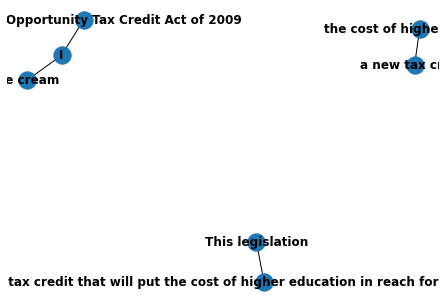

In [0]:
nx.draw(MG, with_labels=True, font_weight='bold')
print(MG.get_edge_data('I','ice cream','like'))
print(MG.get_edge_data('I','ice'))
print(MG.edges)